In [2]:
import pandas as pd
import psycopg2
import json
import os

In [3]:
con = psycopg2.connect(dbname='gdelt_analysis', user='postgres', password='postgres', host='localhost')
cur = con.cursor()

## Number of Articles for the Terms "Black" & "Hate" Over the Past 3 Years

In [4]:
for year in [2016, 2017, 2018]:
    
    cur.execute('''
                select sqldate, sum(numarticles) 
                from gdelt_black
                where left(sqldate, 4)::integer = {0}
                group by sqldate order by sqldate
                '''.format(year))
    
    b_df = pd.DataFrame([r for r in cur.fetchall()], columns=['Date', 'Articles'])
    b_df.plot(x='Date', y='Articles', figsize=(15, 3), title='GDELT Black {}'.format(year))
    
    cur.execute('''
                select sqldate, sum(numarticles) 
                from gdelt_hate
                where left(sqldate, 4)::integer = {0}
                group by sqldate order by sqldate
                '''.format(year))
    
    h_df = pd.DataFrame([r for r in cur.fetchall()], columns=['Date', 'Articles'])
    h_df.plot(x='Date', y='Articles', figsize=(15, 3), title='GDELT Hate {}'.format(year))


## Explore "Event Windows" Over Time

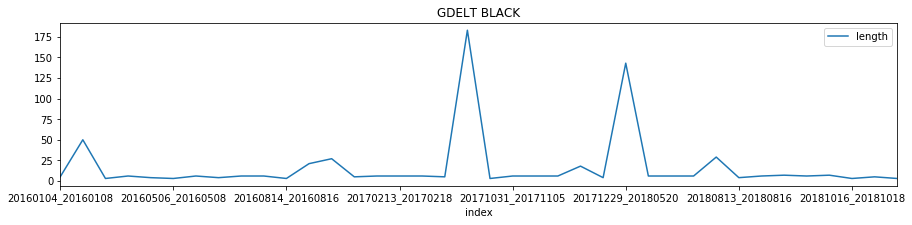

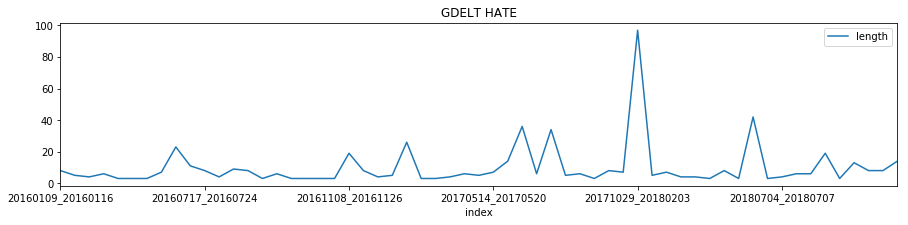

In [5]:
for target in ['black', 'hate']:
    events = json.load(open('gdelt_{}.json'.format(target), 'rb'))
    df = pd.DataFrame.from_dict(events).transpose()
    df.reset_index().plot(x='index', y='length', title='GDELT {}'.format(target.upper()), figsize=(15, 3))

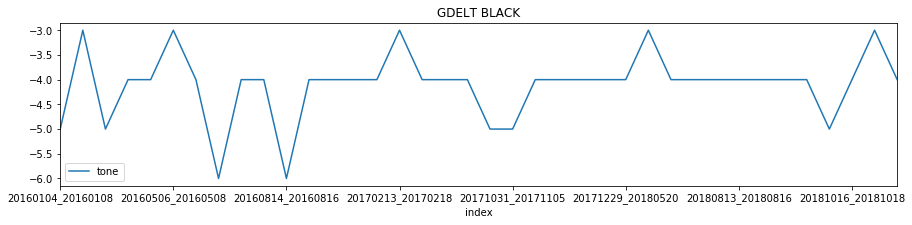

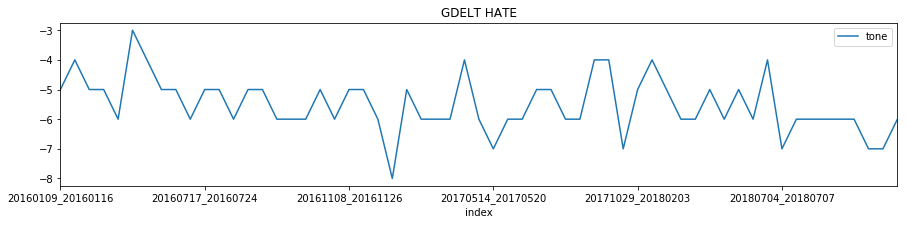

In [6]:
for target in ['black', 'hate']:
    events = json.load(open('gdelt_{}.json'.format(target), 'rb'))
    df = pd.DataFrame.from_dict(events).transpose()
    df.reset_index().plot(x='index', y='tone', title='GDELT {}'.format(target.upper()), figsize=(15, 3))

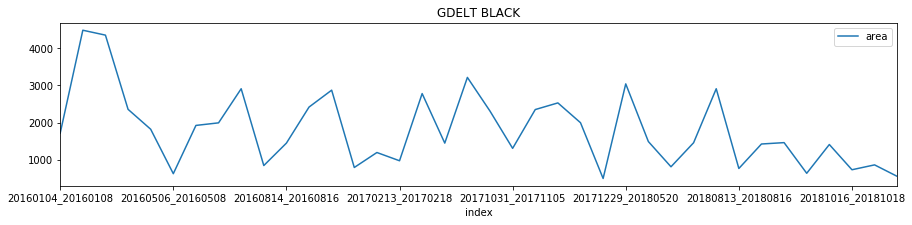

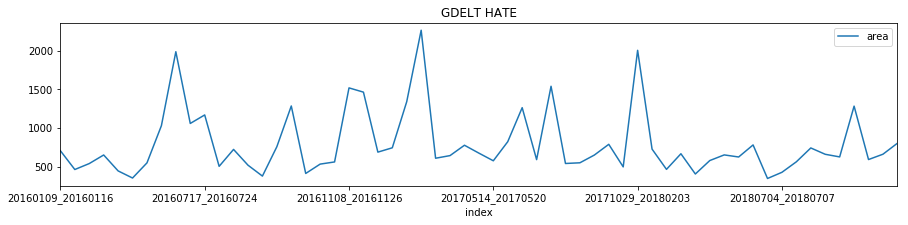

In [7]:
for target in ['black', 'hate']:
    events = json.load(open('gdelt_{}.json'.format(target), 'rb'))
    df = pd.DataFrame.from_dict(events).transpose()
    df.reset_index().plot(x='index', y='area', title='GDELT {}'.format(target.upper()), figsize=(15, 3))

In [11]:
events = json.load(open('gdelt_black.json'.format(target), 'rb'))
df = pd.DataFrame.from_dict(events).transpose()

a_1 = df['actor_one'].apply(pd.Series)
a_1 = a_1.rename(columns = lambda x : 'a1_' + str(x))
df  = pd.concat([df[:], a_1[:]], axis=1)

a_2 = df['actor_two'].apply(pd.Series)
a_2 = a_2.rename(columns = lambda x : 'a2_' + str(x))
df  = pd.concat([df[:], a_2[:]], axis=1)

keys = df['keywords'].apply(pd.Series)
keys = keys.rename(columns = lambda x : 'k_' + str(x))
df  = pd.concat([df[:], keys[:]], axis=1)

df.to_csv('./gdelt_black.csv')
df.head()

In [12]:
events = json.load(open('gdelt_hate.json'.format(target), 'rb'))
df = pd.DataFrame.from_dict(events).transpose()

a_1 = df['actor_one'].apply(pd.Series)
a_1 = a_1.rename(columns = lambda x : 'a1_' + str(x))
df  = pd.concat([df[:], a_1[:]], axis=1)

a_2 = df['actor_two'].apply(pd.Series)
a_2 = a_2.rename(columns = lambda x : 'a2_' + str(x))
df  = pd.concat([df[:], a_2[:]], axis=1)

keys = df['keywords'].apply(pd.Series)
keys = keys.rename(columns = lambda x : 'k_' + str(x))
df  = pd.concat([df[:], keys[:]], axis=1)

df.to_csv('./gdelt_hate.csv')
df.head()

,actor_one,actor_two,area,articles,keywords,length,tone,a1_0,a1_1,a1_2,...,a2_0,a2_1,a2_2,a2_3,a2_4,k_0,k_1,k_2,k_3,k_4
20160109_20160116,"[OBAMA, MASSACHUSETTS, AMERICAN, KANSAS CITY, ...","[SUPREME COURT, TERRORIST, REFUGEE, SUICIDE BO...",707,519,"[told, muslims, muslim, arrested, terrorist]",8,-5,OBAMA,MASSACHUSETTS,AMERICAN,...,SUPREME COURT,TERRORIST,REFUGEE,SUICIDE BOMBER,EMPLOYEE,told,muslims,muslim,arrested,terrorist
20160127_20160131,"[MAYOR, MUSLIM, SECRETARY OF STATE, NEW MEXICO...","[OBAMA, ARCADIA, MUSLIM, FLORIDA, BOSTON]",464,387,"[crimes, sexual, law, gay, state]",5,-4,MAYOR,MUSLIM,SECRETARY OF STATE,...,OBAMA,ARCADIA,MUSLIM,FLORIDA,BOSTON,crimes,sexual,law,gay,state
20160222_20160225,"[SUPREME COURT, COMPANY, AMERICAN, COMMUNITY, ...","[PORTLAND, VILLAGE, REFUGEE, LOS ANGELES, MUSLIM]",541,828,"[crimes, groups, told, students, man]",4,-5,SUPREME COURT,COMPANY,AMERICAN,...,PORTLAND,VILLAGE,REFUGEE,LOS ANGELES,MUSLIM,crimes,groups,told,students,man
20160307_20160312,"[TERRORIST, SYRIAN, ASSAILANT, COMMUNITY, MUSLIM]","[SUPREME COURT, COMPANY, SYRIAN, AMERICAN ENTE...",652,1083,"[center, state, crimes, republican, islam]",6,-5,TERRORIST,SYRIAN,ASSAILANT,...,SUPREME COURT,COMPANY,SYRIAN,AMERICAN ENTERPRISE INSTITUTE,AMERICAN,center,state,crimes,republican,islam
20160401_20160403,"[HOSPITAL, SCHOOL, GUNMAN, TROOPER, DETECTIVE]","[SUPREME COURT, ARIZONA, GUNMAN, CITIZEN, CATH...",446,443,"[world, republican, cant, debate, fox]",3,-6,HOSPITAL,SCHOOL,GUNMAN,...,SUPREME COURT,ARIZONA,GUNMAN,CITIZEN,CATHOLIC,world,republican,cant,debate,fox
